# K nearest neighbor using SKlearn

In [1]:
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
df=pd.read_csv("waterQuality.csv")
df.replace('?',-99999,inplace=True)

In [3]:
x=np.array(df.drop(['is_safe'],1))
y=np.array(df['is_safe'])

C:\Users\Tejveer\AppData\Local\Temp\ipykernel_13952\1864997970.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=np.array(df.drop(['is_safe'],1))


In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [5]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [6]:
accuracy=clf.score(x_test,y_test)
print(accuracy)

0.935


# K nearest neighbor from scratch

In [7]:
import numpy as np
from math import sqrt
from collections import Counter
import warnings
import pandas as pd
import random

In [8]:
def KNearestNeighbors(data,predict,k=3):
    if len(data)>=k:
        warnings.warn('K is set to a value less than total voting groups')
    distance=[]
    for group in data:
        for features in data[group]:
            euclidean_distance=sqrt(np.sum((np.array(features)-np.array(predict))**2))
            distance.append([euclidean_distance,group])
    votes=[i[1] for i in sorted(distance)[:k]]
    vote_result=Counter(votes).most_common(1)[0][0]
    #confidence=Counter(votes).most_common(1)[0][1]/k
    return vote_result

In [9]:
df=pd.read_csv("waterQuality.csv")
df.replace("?",-99999,inplace=True)
full_data=df.astype(float).values.tolist()
random.shuffle(full_data)

In [10]:
test_size=0.2
train_set={0:[],1:[]}
test_set={0:[],1:[]}
train_data=full_data[:-int(test_size*len(full_data))]
test_data=full_data[-int(test_size*len(full_data)):]

In [11]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [12]:
full_data[0]

[3.84,
 2.09,
 0.01,
 3.89,
 0.004,
 1.48,
 0.18,
 0.66,
 0.88,
 0.68,
 0.68,
 0.113,
 17.85,
 1.99,
 0.002,
 13.46,
 5.33,
 0.01,
 0.38,
 0.05,
 1.0]

In [13]:
KNearestNeighbors(train_set,[[0.14,2.6,0.03,1.75,0.007,4.86,0.66,0.86,0.11,0.85,0.85,0.101,6.48,1.06,0.008,17.68,5.59,0.04,0.45,0.06]],k=3)

1

In [14]:
correct=0
total=0
for group in test_set:
    for predict in test_set[group]:
        vote=KNearestNeighbors(train_set,predict,k=5)
        if vote==group:
            correct+=1
        total+=1
print(correct/total)

0.9547738693467337


# K nearest neighbor from scratch on simple dataset

In [15]:
data={0:[[1,2],[2,3],[3,4],[4,5]],1:[[3,9],[4,0],[5,6],[1,9],[2,9]]}

In [16]:
def KNN(data,predict,k=3):
    distance=[]
    for group in data:
        for features in data[group]:
            euclidean_distance=sqrt(np.sum((np.array(features)-np.array(predict))**2))
            distance.append([euclidean_distance,group])
    votes=[i[1] for i in sorted(distance)[:k]]
    votes_result=Counter(votes).most_common(1)[0][0]
    return votes_result
    

In [17]:
res=KNN(data,[3,8],k=3)
res

1

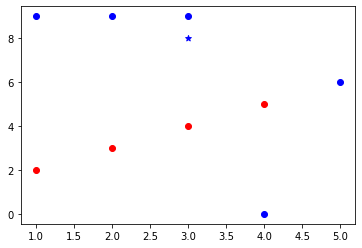

In [18]:
import matplotlib.pyplot as plt
color=['r','b']
for group in data:
    for features in data[group]:
        plt.scatter(features[0],features[1],color=color[group])
plt.scatter(3,8,color=color[res],marker='*')
plt.show()